## MNIST

## Reading data

In [16]:
import torch
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
mnist_train = dsets.MNIST(root = "MNIST_data/", train = True, transform = torchvision.transforms.ToTensor(), download = True)

mnist_test = dsets.MNIST(root = "MNIST_data/", train = False, transform = torchvision.transforms.ToTensor(), download = True)
#DataLoader를 dateset으로 바꾸니 됨
data_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = 100, shuffle = True, drop_last = True)

#MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10 ,bias= True).to(device)
#initialization
torch.nn.init.normal_(linear.weight)
#parameters
training_epochs = 20
batch_size = 100
# define cost/Loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # Label is not one-hot encoded
        X = X.view(-1,28 * 28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print("Epoch: ", "%04d" % (epoch+1), "cost = ", "{:.9f}".format(avg_cost))

Epoch:  0001 cost =  2.745348454
Epoch:  0002 cost =  1.059187531
Epoch:  0003 cost =  0.844054937
Epoch:  0004 cost =  0.739262044
Epoch:  0005 cost =  0.673619568
Epoch:  0006 cost =  0.626395404
Epoch:  0007 cost =  0.591207325
Epoch:  0008 cost =  0.562674522
Epoch:  0009 cost =  0.539698124
Epoch:  0010 cost =  0.519908965
Epoch:  0011 cost =  0.502898872
Epoch:  0012 cost =  0.489053577
Epoch:  0013 cost =  0.476038426
Epoch:  0014 cost =  0.464439780
Epoch:  0015 cost =  0.454218805
Epoch:  0016 cost =  0.444543958
Epoch:  0017 cost =  0.436543941
Epoch:  0018 cost =  0.428686619
Epoch:  0019 cost =  0.421215683
Epoch:  0020 cost =  0.414932966


In [17]:
#Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1,28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction , 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

Accuracy:  0.8639000058174133


Label:  2
Prediction:  2


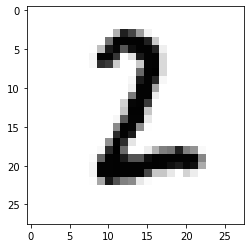

Label:  1
Prediction:  1


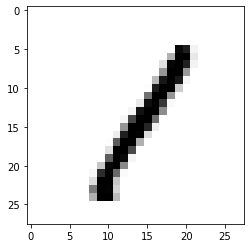

Label:  5
Prediction:  8


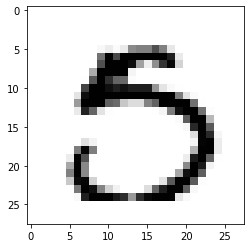

Label:  8
Prediction:  8


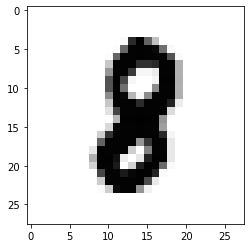

Label:  2
Prediction:  2


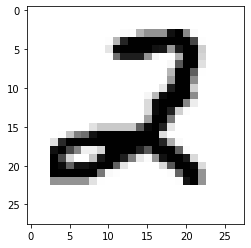

Label:  0
Prediction:  0


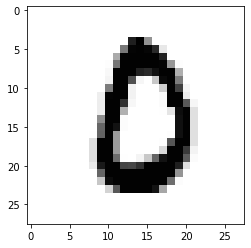

Label:  8
Prediction:  8


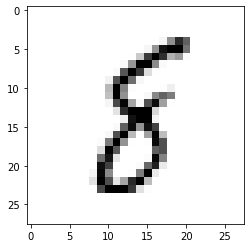

Label:  2
Prediction:  2


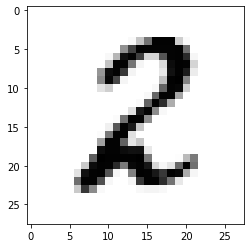

Label:  9
Prediction:  9


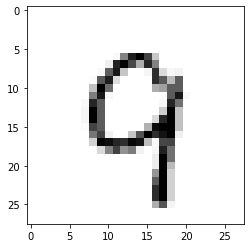

Label:  2
Prediction:  8


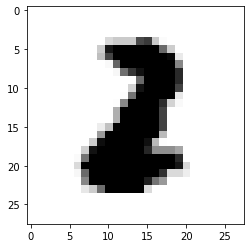

In [15]:
import matplotlib.pyplot as plt
import random
times = 10
for time in range(times):
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1,28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print("Label: ", Y_single_data.item())
    single_prediction = linear(X_single_data)
    print("Prediction: ", torch.argmax(single_prediction,1).item())

    plt.imshow(mnist_test.test_data[r:r+1].view(28,28),cmap="Greys", interpolation="nearest")
    plt.show()